In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf

tf.enable_eager_execution()
tf.set_random_seed(777)
print(tf.__version__)

1.12.0


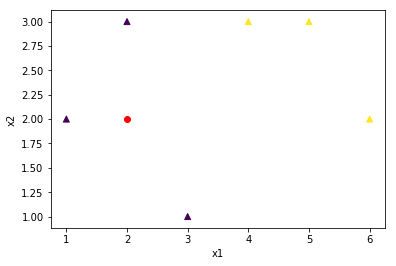

In [10]:
##x_data는 2차원 배열 데이터, y_data는 0과 1로 구분된다
x_train= [[1., 2.],
          [2., 3.],
          [3., 1.],
          [4., 3.],
          [5., 3.],
          [6., 2.]]
y_train = [[0.],
          [0.],
          [0.],
          [1.],
          [1.],
          [1.]]

x_test=[[2.,2.]]
y_test=[[0.]]

x1 = [x[0] for x in x_train]
x2 = [x[1] for x in x_train]

colors = [int(y[0]%3) for y in y_train]
plt.scatter(x1,x2, c=colors, marker='^')
plt.scatter(x_test[0][0],x_test[0][1],c="red")

plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

In [11]:
dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train)).batch(len(x_train))
#batch size는 한 번에 학습시킬 size로 정한다

In [4]:
W = tf.Variable(tf.zeros([2,1]),name='weight')
b = tf.Variable(tf.zeros([1]),name='bias')

In [5]:
def logistic_regression(features):
    hypothesis = tf.div(1.,1.+tf.exp(tf.matmul(features,W) + b ))
    return hypothesis

In [6]:
def loss_fn(hypothesis, features, labels):
    cost = -tf.reduce_mean(labels*tf.log(hypothesis)+(1-labels)*tf.log(1-hypothesis))
    return cost

optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)

In [7]:
# sigmoid 함수값이 0.5 이상이 나오면 1, 그 이하는 0이 나오도록 지정
def accuracy_fn(hypothesis,labels):
    predicted = tf.cast(hypothesis > 0.5,dtype=tf.float32)
    accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted,labels),dtype=tf.int32))
    return accuracy

In [8]:
def grad(hypothesis,features,labels):
    with tf.GradientTape() as tape:
        loss_value = loss_fn(logistic_regression(features),features,labels)
    return tape.gradient(loss_value, [W,b])

In [12]:
EPOCHS = 1001

for step in range(EPOCHS):
    for features, labels in iter(dataset):
        grads = grad(logistic_regression(features),features,labels)
        optimizer.apply_gradients(grads_and_vars=zip(grads,[W,b]))
        if step % 100 ==0:
            print("Iter: {}, Loss: {:.4f}".format(step,loss_fn(logistic_regression(features),features,labels)))
test_acc = accuracy_fn(logistic_regression(x_test),y_test)
print("Testset Accuracy: {:.4f}".format(test_acc))

Iter: 0, Loss: 0.4143
Iter: 100, Loss: 0.4065
Iter: 200, Loss: 0.3991
Iter: 300, Loss: 0.3921
Iter: 400, Loss: 0.3854
Iter: 500, Loss: 0.3789
Iter: 600, Loss: 0.3727
Iter: 700, Loss: 0.3666
Iter: 800, Loss: 0.3607
Iter: 900, Loss: 0.3550
Iter: 1000, Loss: 0.3495
Testset Accuracy: 1.0000
